(a) Download the Vertebral Column Data Set

In [229]:
import pandas as pd
df = pd.read_csv("../data/Homework 1 Data/vertebral_column_data/column_2C.dat",
                 sep=' ', header=None)
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
              'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


(b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

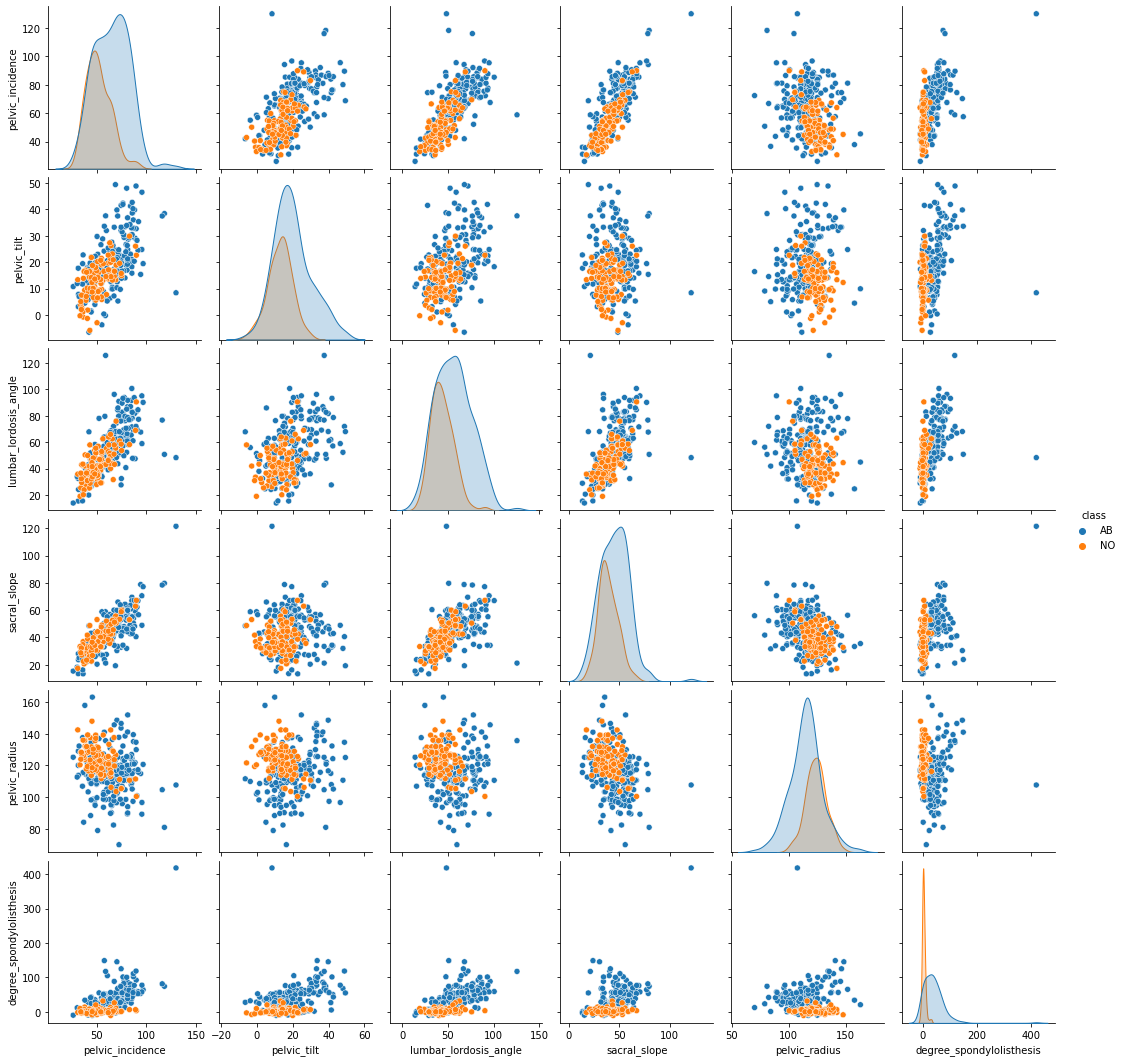

In [230]:
import seaborn
seaborn.pairplot(df, vars=df.columns[:-1], hue="class")

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

<AxesSubplot:xlabel='class', ylabel='pelvic_incidence'>

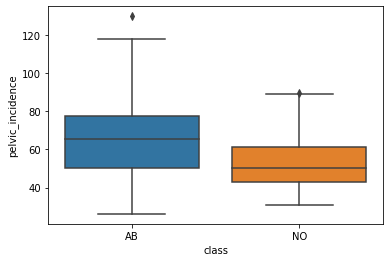

In [231]:
seaborn.boxplot(data=df, x='class', y='pelvic_incidence')

<AxesSubplot:xlabel='class', ylabel='pelvic_tilt'>

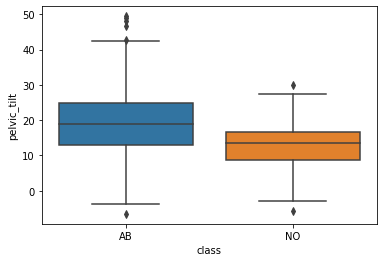

In [232]:
seaborn.boxplot(data=df, x='class', y='pelvic_tilt')

<AxesSubplot:xlabel='class', ylabel='lumbar_lordosis_angle'>

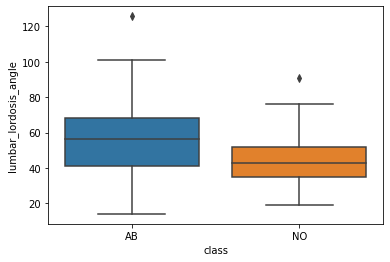

In [233]:
seaborn.boxplot(data=df, x='class', y='lumbar_lordosis_angle')

<AxesSubplot:xlabel='class', ylabel='sacral_slope'>

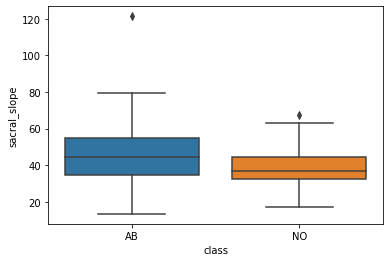

In [234]:
seaborn.boxplot(data=df, x='class', y='sacral_slope')

<AxesSubplot:xlabel='class', ylabel='pelvic_radius'>

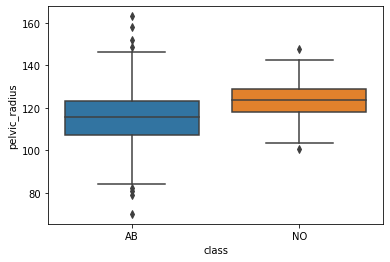

In [235]:
seaborn.boxplot(data=df, x='class', y='pelvic_radius')

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

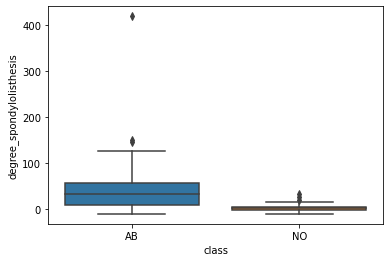

In [236]:
seaborn.boxplot(data=df, x='class', y='degree_spondylolisthesis')


iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [237]:
def use_all_data():
    train_set = df[df['class']=='AB'][:140]
    train_set = train_set.append(df[df['class']=='NO'][:70])
    test_set = df[df['class']=='AB'][140:]
    test_set = test_set.append(df[df['class']=='NO'][70:])
    train_set=train_set.to_numpy()
    test_set=test_set.to_numpy()
    return train_set, test_set
train_set, test_set = use_all_data()

(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

In [238]:
from sklearn.neighbors import KNeighborsClassifier as knn

k1 = knn(3)
k1.fit(train_set[:, :-1], train_set[:, -1])

KNeighborsClassifier(n_neighbors=3)

ii. Test all the data in the test database with k nearest neighbors.
Take decisions by majority polling. Plot train and test errors in terms of k for
k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller
increments of k. Which k∗ is the most suitable k among those values?
Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k∗.2

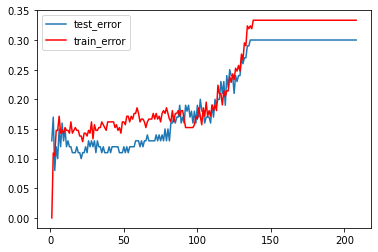

the most suitable k is:  3
confusion matrix:
 [[69  1]
 [ 7 23]]
true positive rate: 0.9857142857142858
true negative rate 0.7666666666666667
precision 0.9078947368421053
F1-score 0.9452054794520548


In [239]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import sklearn

train_set, test_set = use_all_data()

test_error, train_error = [], []

def count_error(k, metric='minkowski', p=2, weights='uniform'):
    if metric=='chebyshev': knn_k=knn(n_neighbors=k, metric=metric, weights=weights)
    elif metric=='mahalanobis':
        X, y = make_classification()
        knn_k=knn(n_neighbors=k, metric=metric, algorithm='brute',
                  metric_params={'VI': np.cov(X)}, weights=weights)
    else: knn_k=knn(n_neighbors=k, metric=metric, p=p, weights=weights)
    knn_k.fit(train_set[:, :-1], train_set[:, -1])
    false=0
    pred_train = knn_k.predict(train_set[:,:-1])
    for i in range(len(train_set)):
        if pred_train[i]!=train_set[i][-1]:
            false+=1
    train_error.append(false/len(train_set))
    false=0
    pred_test = knn_k.predict(test_set[:,:-1])
    for i in range(len(test_set)):
        if pred_test[i]!=test_set[i][-1]:
            false+=1
    test_error.append(false/len(test_set))

def find_optimal_k(is_plot=True, return_min_test_error=False,
                   k_max=208, metric='minkowski', p=2, weights='uniform'):
    k_range = [i for i in range(k_max,0,-1)]
    for k in k_range:
        count_error(k, metric, p, weights)
    if is_plot:
        l1=plt.plot(k_range, test_error, label='test_error')
        l2=plt.plot(k_range,train_error,color='red', label='train_error')
        plt.legend()
        plt.show()
    min_error_id=test_error.index(min(test_error))
    # print('find_optimal_k: ',len(k_range), len(test_error))
    suitable_k = k_range[min_error_id]
    if return_min_test_error:
        return suitable_k, min(test_error)
    return suitable_k

suitable_k=find_optimal_k()
print('the most suitable k is: ', suitable_k)

def count_metrics(k):
    knn_k=knn(k)
    knn_k.fit(train_set[:, :-1], train_set[:, -1])
    tp,tn,fp,fn=0,0,0,0
    pred_test = knn_k.predict(test_set[:,:-1])
    print('confusion matrix:\n', sklearn.metrics.confusion_matrix(test_set[:,-1],
                               pred_test, labels=None, sample_weight=None))
    for i in range(len(test_set)):
        if test_set[i][-1]=='AB':
            if pred_test[i]=='AB': tp+=1
            if pred_test[i]=='NO': fn+=1
        elif test_set[i][-1]=='NO':
            if pred_test[i]=='NO': tn+=1
            if pred_test[i]=='AB': fp+=1
    # print(tp,fp,tn,fn)
    tpr=tp/(tp+fn) # recall
    tnr=tn/(tn+fp)
    precision=tp/(tp+fp)
    f1_score=(2*tpr*precision)/(tpr+precision)
    print('true positive rate:', tpr)
    print('true negative rate',tnr)
    print('precision',precision)
    print('F1-score',f1_score)

count_metrics(suitable_k)


iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate,3 which
is obtained by some value of k, against the size of training set, when the
size of training set is N ∈ {10, 20, 30, . . . , 210}.4 Note: for each N, select
your training set by choosing the first bN/3c rows of Class 0 and the first
N − bN/3c rows of Class 1 in the training set you created in 1(b)iii. Also, for
each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.

100%|██████████| 21/21 [00:14<00:00,  1.41it/s]


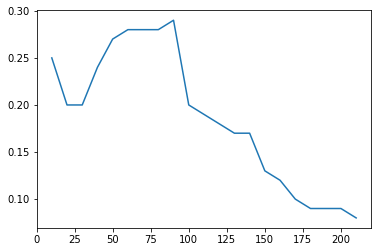

In [240]:
from tqdm import tqdm

def generate_N_set(N):
    train_set = df[df['class']=='AB'][:(N-N//3)]
    train_set = train_set.append(df[df['class']=='NO'][:N//3])
    test_set = df[df['class']=='AB'][140:]
    test_set = test_set.append(df[df['class']=='NO'][70:])
    train_set=train_set.to_numpy()
    test_set=test_set.to_numpy()
    return train_set, test_set

N_list=[i for i in range(10,220,10)]
suitable_k_list=[]
min_test_error=[]
for N in tqdm(N_list):
    train_set, test_set = generate_N_set(N)
    test_error, train_error = [], []
    suitable_k_list.append(find_optimal_k(is_plot=False,k_max=N))
    min_test_error.append(min(test_error))
    # print(len(suitable_k_list),len(min_test_error))

plt.plot(N_list, min_test_error)
plt.show()

(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize
the test errors (i.e., when k = k∗) in a table. Use all of your training data
and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.

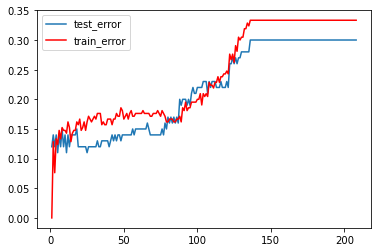

Using Manhattan Distance, the most suitable k is:  25  test error: 0.11


In [241]:
train_set, test_set = use_all_data()
test_error, train_error = [], []
suitable_k, error=find_optimal_k(p=1, return_min_test_error=True)
print('Using Manhattan Distance, the most suitable k is: ', suitable_k,
      ' test error:' ,error)

B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found
for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [242]:
import numpy as np
train_set, test_set = use_all_data()
min_error = 1
best_p = 0.1
for p in tqdm(np.arange(0.1,1.1,0.1)):
    test_error, train_error = [], []
    # print(pow(10,p))
    suitable_k, error = find_optimal_k(p=pow(10,p),is_plot=False,
                                       return_min_test_error=True)
    if error<min_error:
        min_error=error
        best_p=p

print("the best log10(p) is: ", best_p, ' min test error is:', min_error)

100%|██████████| 10/10 [00:33<00:00,  3.32s/it]

the best log10(p) is:  0.30000000000000004  min test error is: 0.08


C. which becomes Chebyshev Distance with p → ∞

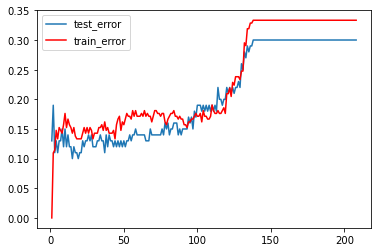

Using Chebyshev Distance, the most suitable k is:  19  test error: 0.1


In [243]:
train_set, test_set = use_all_data()
test_error, train_error = [], []
suitable_k, error=find_optimal_k(metric='chebyshev', return_min_test_error=True)
print('Using Chebyshev Distance, the most suitable k is: ', suitable_k,
      ' test error:' ,error)

ii. Mahalanobis Distance.6

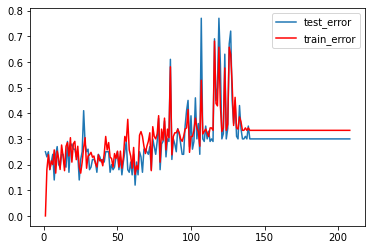

Using Mahalanobis Distance, the most suitable k is:  62  test error: 0.12


In [244]:
train_set, test_set = use_all_data()
test_error, train_error = [], []
suitable_k, error=find_optimal_k(metric='mahalanobis', return_min_test_error=True)
print('Using Mahalanobis Distance, the most suitable k is: ', suitable_k,
      ' test error:' ,error)

(e) The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11, 16, . . . , 196}.

Euclidean:

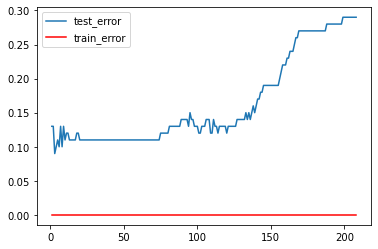

Using Euclidean Distance, the most suitable k is:  3  test error: 0.09


In [245]:
train_set, test_set = use_all_data()
test_error, train_error = [], []
suitable_k, error=find_optimal_k(return_min_test_error=True, weights='distance')
print('Using Euclidean Distance, the most suitable k is: ', suitable_k,
      ' test error:' ,error)

Manhattan:

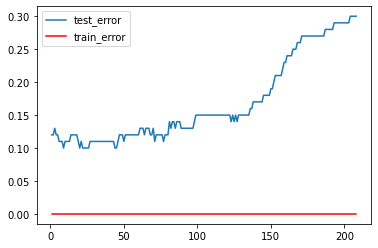

Using Manhattan Distance, the most suitable k is:  45  test error: 0.1


In [246]:
train_set, test_set = use_all_data()
test_error, train_error = [], []
suitable_k, error=find_optimal_k(p=1, return_min_test_error=True, weights='distance')
print('Using Manhattan Distance, the most suitable k is: ', suitable_k,
      ' test error:' ,error)

Chebyshev:

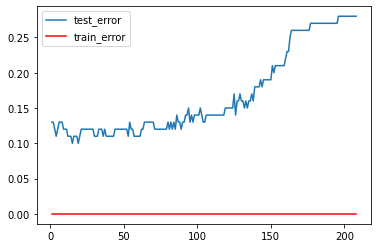

Using Chebyshev Distance, the most suitable k is:  19  test error: 0.1


In [247]:
train_set, test_set = use_all_data()
test_error, train_error = [], []
suitable_k, error=find_optimal_k(metric='chebyshev', return_min_test_error=True, weights='distance')
print('Using Chebyshev Distance, the most suitable k is: ', suitable_k,
      ' test error:' ,error)

(f) What is the lowest training error rate you achieved in this homework?

In [248]:
print('lowest training error rate is 0, when k=1')


lowest training error rate is 0, when k=1
